<a href="https://colab.research.google.com/github/Hitha83/Cifar_Classification/blob/main/3_cifar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing necessary libraries
from __future__ import print_function
import keras
from keras.utils.np_utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [15]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
test_loader = (x_test,y_test)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


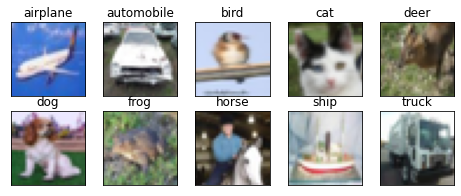

In [16]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [17]:
# Convert class vectors to binary class matrices.

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [18]:
# Printing sample data
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

train_loader = []
train_loader.append(x_train)
train_loader.append(y_train)


test_loader = []
test_loader.append(x_test)
test_loader.append(y_test)

**Defining Model**

In [20]:
class NetA:
  model = Sequential()
  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(num_classes, activation='softmax'))

In [21]:
class NetB:
  model = Sequential()
  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(300))
  model.add(Activation('relu'))
  model.add(Dense(num_classes, activation='softmax'))

In [22]:
#filter shape
class NetC:
  filter_shape = [5,5]
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size=filter_shape, padding='same',activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

**Compiling**

In [25]:
NUM_EPOCHS=50
LEARNING_RATE = 0.001
def train(net, train_loader, test_loader,num_epochs=NUM_EPOCHS,learning_rate=LEARNING_RATE,compute_accs=True):

  model = net.model
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
  x_train = train_loader[0]
  y_train = train_loader[1]
  x_test = test_loader[0]
  y_test = test_loader[1]
  model.fit(x_train,y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  pred_train= model.predict(x_train)
  train_scores = model.evaluate(x_train, y_train, verbose=0)
  train_accuracy = train_scores[1]*100
 
  pred_test= model.predict(x_test)
  test_scores = model.evaluate(x_test, y_test, verbose=0)
  test_accuracy = test_scores[1]*100
  return train_accuracy,test_accuracy;


In [69]:
def plot_history(histories):
  names = []
  trains = []
  tests = []
  for history in histories:
    names.append(history['name'])
    trains.append(history['train_accs'])
    tests.append(history['test_accs'])
  barWidth = 0.2
  fig = plt.subplots(figsize=(12,8))
  br1 = np.arange(len(names))
  br2 = [ x + 2.5 * barwidth for x in br1]
  plt.bar(br1,trains,color='r',width=barWidth,label='Train')
  plt.bar(br2,tests,color='g',width=barWidth,label='Test')

  plt.xlabel('Model',fontweight=15)
  plt.ylabel('Accuracy',fontweight=15)
  plt.xticks([r + barwidth for r in range(len(names))],['NetA','NetB','NetC'])



**Model Training**

==== Training NetA ====
Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6562 - accuracy: 0.4354 - val_loss: 1.8269 - val_accuracy: 0.3735
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6598 - accuracy: 0.4292 - val_loss: 1.8436 - val_accuracy: 0.3705
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6592 - accuracy: 0.4297 - val_loss: 1.7967 - val_accuracy: 0.3752
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6530 - accuracy: 0.4325 - val_loss: 1.8487 - val_accuracy: 0.3726
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6610 - accuracy: 0.4298 - val_loss: 1.8566 - val_accuracy: 0.3640
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6504 - accuracy: 0.4314 - val_loss: 1.8118 - val_accuracy: 0.3719
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6550 - accuracy: 0.4277 - val_loss

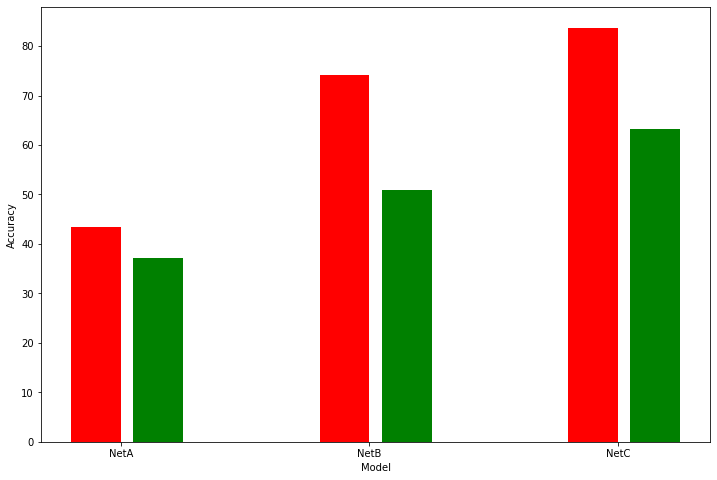

In [70]:
nets = [NetA(), NetB(), NetC()]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training {net_name} ====')
  train_history, test_history = train(net, train_loader, test_loader,
                                    num_epochs=NUM_EPOCHS,
                                    learning_rate=LEARNING_RATE,
                                    compute_accs=True)
  histories.append({
          'name': net_name,
          'net': net,
          'train_accs': train_history,
          'test_accs': test_history
            })
plot_history(histories)